#  Wordcloud from PDF using an Image Mask using Image Colors

###  PDF to txt

In [6]:
#Instal PyPDF2 to convert PDF into text
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import PyPDF2   #PDF to text
import re       #removes punctuation


In [ ]:
#                Sources for help
#                From: https://www.youtube.com/watch?v=RULkvM7AdzY
#                From: https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214 


In [159]:
# pdf file and txt file name

pdf_to_convert = 'american-short-fiction-001-the-legend-of-sleepy-hollow.pdf'
txt_file_name = r'american-short-fiction-001-the-legend-of-sleepy-hollow.txt'

In [160]:
#  Function:  Convert multiple pages of PDF text into one combined text file.

def extract_text_from_pdf(pdf_file: str) -> [str]:
    # Open the PDF file of your choice
    with open(pdf_file, 'rb') as pdf:
        reader = PyPDF2.PdfFileReader(pdf, strict=False)
        no_pages = len(reader.pages)
        pdf_text = []

        for page in reader.pages:
            content = page.extract_text()
            pdf_text.append(content)
        print("Combined {} pages of PDF into a txt file".format(no_pages))
        return pdf_text

#  Function:  takes pdf file and converts it into text; can remove punctuation and seperate words for analysis.

def main():
    extracted_text = extract_text_from_pdf(pdf_to_convert)
    for text in extracted_text:
        #split_message = re.split(r'\s+|[,;?!.-]\s*', text.lower())
        #print(text)
        #print(split_message)
        file1=open(txt_file_name,"a")
        file1.writelines(text)

if __name__ == '__main__':
    main()


Combined 33 pages of PDF into a txt file


###  WordCloud setup

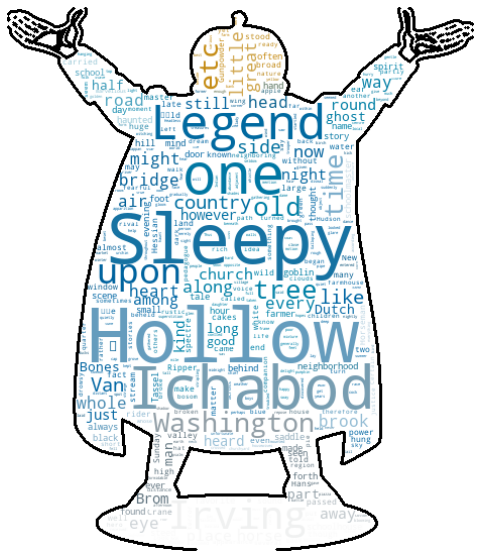

In [175]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')#imported word list to remove from the wordcloud
new_stopwords=['Lit2Go','web','usf']  #custom stopwords form text to remove from the wordcloud

for word in new_stopwords:
    stop_words.append(word)

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# image to use for mask
mask_image = 'bluehorse3.png'

# create a mask based on the image we wish to include
my_mask = np.array(Image.open(mask_image))

# create a wordcloud
wc = WordCloud(background_color='white',
                   mask=my_mask,
                   collocations=False,
                   width=600,
                   height=300,
                   max_words=1000,
                   contour_width=3,
                   contour_color='black',
                   stopwords=stop_words)

with open(txt_file_name,encoding='gb18030',errors='ignore') as txt_file:
    texto = txt_file.read()
wc.generate(texto)
image_colors = ImageColorGenerator(my_mask)
wc.recolor(color_func=image_colors)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('HeadlessHorsemanWC.png')
plt.show()

###  Image Mask Cleaner

In [185]:
poem_mask = np.array(Image.open("horse.png"))
poem_mask

In [183]:
def transform_format(val):
    if val.any() == 0:
        return 255
    else:
        return val

In [186]:
# Transform your mask into a new one that will work with the function:
#transformed_poem_mask = np.ndarray((poem_mask.shape[0],poem_mask.shape[1]), np.int32)

for i in range(len(poem_mask)):
    transformed_poem_mask[i] = list(map(transform_format, poem_mask[i]))

In [150]:
transformed_poem_mask